### Demographics and employment in the united states

In the wake of the Great Recession of 2009, there has been a good deal of focus on employment statistics, one of the most important metrics policymakers use to gauge the overall strength of the economy. In the United States, the government measures unemployment using the Current Population Survey (CPS), which collects demographic and employment information from a wide range of Americans each month. In this exercise, we will employ the topics reviewed in the lectures as well as a few new techniques using the September 2013 version of this rich, nationally representative dataset (available [online](http://thedataweb.rm.census.gov/ftp/cps_ftp.html)).

The observations in the dataset represent people surveyed in the September 2013 CPS who actually completed a survey. While the full dataset has 385 variables, in this exercise we will use a more compact version of the dataset, CPSData.csv, which has the following variables:

PeopleInHousehold: The number of people in the interviewee's household.

Region: The census region where the interviewee lives.

State: The state where the interviewee lives.

MetroAreaCode: A code that identifies the metropolitan area in which the interviewee lives (missing if the interviewee does not live in a metropolitan area). The mapping from codes to names of metropolitan areas is provided in the file MetroAreaCodes.csv.

Age: The age, in years, of the interviewee. 80 represents people aged 80-84, and 85 represents people aged 85 and higher.

Married: The marriage status of the interviewee.

Sex: The sex of the interviewee.

Education: The maximum level of education obtained by the interviewee.

Race: The race of the interviewee.

Hispanic: Whether the interviewee is of Hispanic ethnicity.

CountryOfBirthCode: A code identifying the country of birth of the interviewee. The mapping from codes to names of countries is provided in the file CountryCodes.csv.

Citizenship: The United States citizenship status of the interviewee.

EmploymentStatus: The status of employment of the interviewee.

Industry: The industry of employment of the interviewee (only available if they are employed).

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt

#### Problem 1.1 - Loading and Summarizing the Dataset

Load the dataset from CPSData.csv into a data frame called CPS, and view the dataset with the summary() and str() commands.

How many interviewees are in the dataset?

In [3]:
CPS = pd.read_csv('CPSData.csv')

In [4]:
CPS.describe()

PeopleInHousehold  MetroAreaCode            Age       Hispanic  \
count      131302.000000   97064.000000  131302.000000  131302.000000   
mean            3.284276   35074.709264      38.829226       0.139328   
std             1.700173   16551.637597      22.897130       0.346289   
min             1.000000   10420.000000       0.000000       0.000000   
25%             2.000000   21780.000000      19.000000       0.000000   
50%             3.000000   34740.000000      39.000000       0.000000   
75%             4.000000   41860.000000      57.000000       0.000000   
max            15.000000   79600.000000      85.000000       1.000000   

       CountryOfBirthCode  
count       131302.000000  
mean            82.684079  
std             75.476511  
min             57.000000  
25%             57.000000  
50%             57.000000  
75%             57.000000  
max            555.000000

In [5]:
CPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131302 entries, 0 to 131301
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PeopleInHousehold   131302 non-null  int64  
 1   Region              131302 non-null  object 
 2   State               131302 non-null  object 
 3   MetroAreaCode       97064 non-null   float64
 4   Age                 131302 non-null  int64  
 5   Married             105964 non-null  object 
 6   Sex                 131302 non-null  object 
 7   Education           105964 non-null  object 
 8   Race                131302 non-null  object 
 9   Hispanic            131302 non-null  int64  
 10  CountryOfBirthCode  131302 non-null  int64  
 11  Citizenship         131302 non-null  object 
 12  EmploymentStatus    105513 non-null  object 
 13  Industry            66242 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 14.0+ MB


In [6]:
CPS.shape[0]

131302

#### Problem 1.2 - Loading and Summarizing the Dataset

Among the interviewees with a value reported for the Industry variable, what is the most common industry of employment? Please enter the name exactly how you see it.

In [7]:
CPS.Industry.value_counts()

Educational and health services                15017
Trade                                           8933
Professional and business services              7519
Manufacturing                                   6791
Leisure and hospitality                         6364
Construction                                    4387
Financial                                       4347
Transportation and utilities                    3260
Other services                                  3224
Public administration                           3186
Information                                     1328
Agriculture, forestry, fishing, and hunting     1307
Mining                                           550
Armed forces                                      29
Name: Industry, dtype: int64

In [ ]:
Educational and health services

#### Problem 1.3 - Loading and Summarizing the Dataset

Recall from the homework assignment "The Analytical Detective" that you can call the sort() function on the output of the table() function to obtain a sorted breakdown of a variable. For instance, sort(table(CPS$Region)) sorts the regions by the number of interviewees from that region.

Which state has the fewest interviewees?

In [9]:
CPS.State.value_counts(ascending=True)

New Mexico               1102
Montana                  1214
Mississippi              1230
Alabama                  1376
West Virginia            1409
Arkansas                 1421
Louisiana                1450
Idaho                    1518
Oklahoma                 1523
Arizona                  1528
Alaska                   1590
Wyoming                  1624
North Dakota             1645
South Carolina           1658
Tennessee                1784
District of Columbia     1791
Kentucky                 1841
Utah                     1842
Nevada                   1856
Vermont                  1890
Kansas                   1935
Oregon                   1943
Nebraska                 1949
Massachusetts            1987
South Dakota             2000
Indiana                  2004
Hawaii                   2099
Missouri                 2145
Rhode Island             2209
Delaware                 2214
Maine                    2263
Washington               2366
Iowa                     2528
New Jersey

Which state has the largest number of interviewees?

In [18]:
CPS.State.value_counts(ascending=True).index.tolist()[-1]

'California'

#### Problem 1.4 - Loading and Summarizing the Dataset

What proportion of interviewees are citizens of the United States?

In [20]:
CPS.Citizenship.value_counts()/len(CPS)

Citizen, Native         0.888326
Non-Citizen             0.057806
Citizen, Naturalized    0.053868
Name: Citizenship, dtype: float64

In [27]:
1 - CPS['Citizenship'][CPS['Citizenship'] == 'Non-Citizen'].value_counts()[0]/len(CPS)

0.9421943306271039

#### Problem 1.5 - Loading and Summarizing the Dataset

The CPS differentiates between race (with possible values American Indian, Asian, Black, Pacific Islander, White, or Multiracial) and ethnicity. A number of interviewees are of Hispanic ethnicity, as captured by the Hispanic variable. For which races are there at least 250 interviewees in the CPS dataset of Hispanic ethnicity? (Select all that apply.)

In [28]:
pd.crosstab(CPS.Hispanic, CPS.Race)

Race      American Indian  Asian  Black  Multiracial  Pacific Islander  White
Hispanic                                                                     
0                    1129   6407  13292         2449               541  89190
1                     304    113    621          448                77  16731

In [29]:
pd.crosstab(CPS.Hispanic, CPS.Race) > 250

Race      American Indian  Asian  Black  Multiracial  Pacific Islander  White
Hispanic                                                                     
0                    True   True   True         True              True   True
1                    True  False   True         True             False   True

In [31]:
( pd.crosstab(CPS.Hispanic, CPS.Race) / len(CPS) ) * 100

Race      American Indian     Asian      Black  Multiracial  Pacific Islander  \
Hispanic                                                                        
0                0.859850  4.879591  10.123227     1.865166          0.412027   
1                0.231527  0.086061   0.472955     0.341198          0.058643   

Race          White  
Hispanic             
0         67.927374  
1         12.742380

#### Problem 2.1 - Evaluating Missing Values

Which variables have at least one interviewee with a missing (NA) value? (Select all that apply.)

In [32]:
 CPS.isna().sum()

PeopleInHousehold         0
Region                    0
State                     0
MetroAreaCode         34238
Age                       0
Married               25338
Sex                       0
Education             25338
Race                      0
Hispanic                  0
CountryOfBirthCode        0
Citizenship               0
EmploymentStatus      25789
Industry              65060
dtype: int64

#### Problem 2.2 - Evaluating Missing Values

Often when evaluating a new dataset, we try to identify if there is a pattern in the missing values in the dataset. We will try to determine if there is a pattern in the missing values of the Married variable. The function is.na(CPS$Married) returns a vector of TRUE/FALSE values for whether the Married variable is missing. We can see the breakdown of whether Married is missing based on the reported value of the Region variable with the function table(CPS$Region, is.na(CPS$Married)). Which is the most accurate:

In [34]:
pd.crosstab(CPS.Region, CPS.Married.isna())

Married    False  True 
Region                 
Midwest    24609   6075
Northeast  21432   4507
South      33535   7967
West       26388   6789

In [35]:
 CPS.Region.value_counts() / CPS.Region.value_counts().sum()

South        0.316080
West         0.252677
Midwest      0.233690
Northeast    0.197552
Name: Region, dtype: float64

In [38]:
CPS['Married_is_NA'] = CPS['Married'].isna()

# Crear una tabla de contingencia
contingency_table = pd.crosstab(CPS['Married_is_NA'], CPS['Region'], normalize='columns')
contingency_table

Region          Midwest  Northeast     South     West
Married_is_NA                                        
False          0.802014   0.826246  0.808033  0.79537
True           0.197986   0.173754  0.191967  0.20463

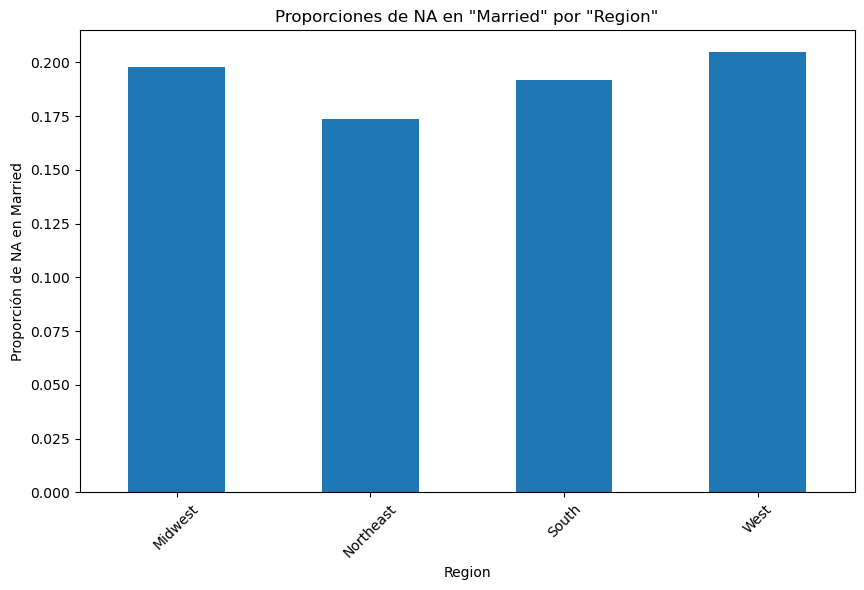

In [39]:
proportions = contingency_table.loc[True]

proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Proporciones de NA en "Married" por "Region"')
plt.xlabel('Region')
plt.ylabel('Proporción de NA en Married')
plt.xticks(rotation=45) 
plt.show()

#### Problem 2.3 - Evaluating Missing Values

As mentioned in the variable descriptions, MetroAreaCode is missing if an interviewee does not live in a metropolitan area. Using the same technique as in the previous question, answer the following questions about people who live in non-metropolitan areas.

How many states had all interviewees living in a non-metropolitan area (aka they have a missing MetroAreaCode value)? For this question, treat the District of Columbia as a state (even though it is not technically a state).

In [40]:
pd.crosstab(CPS.State, CPS.MetroAreaCode.isna())

MetroAreaCode         False  True 
State                             
Alabama                1020    356
Alaska                    0   1590
Arizona                1327    201
Arkansas                724    697
California            11333    237
Colorado               2545    380
Connecticut            2593    243
Delaware               1696    518
District of Columbia   1791      0
Florida                4947    202
Georgia                2250    557
Hawaii                 1576    523
Idaho                   761    757
Illinois               3473    439
Indiana                1420    584
Iowa                   1297   1231
Kansas                 1234    701
Kentucky                908    933
Louisiana              1216    234
Maine                   909   1354
Maryland               2978    222
Massachusetts          1858    129
Michigan               2517    546
Minnesota              2150    989
Mississippi             376    854
Missouri               1440    705
Montana                 199   1015
Nebraska                816   1133
Nevada                 1609    247
New Hampshire          1148   1514
New Jersey             2567      0
New Mexico              832    270
New York               5144    451
North Carolina         1642    977
North Dakota            432   1213
Ohio                   2754    924
Oklahoma               1024    499
Oregon                 1519    424
Pennsylvania           3245    685
Rhode Island           2209      0
South Carolina         1139    519
South Dakota            595   1405
Tennessee              1149    635
Texas                  6060   1017
Utah                   1455    387
Vermont                 657   1233
Virginia               2367    586
Washington             1937    429
West Virginia           344   1065
Wisconsin              1882    804
Wyoming                   0   1624

In [43]:
crosstabStateMetroAreaCode = pd.crosstab(CPS.State, CPS.MetroAreaCode.isna())

In [51]:
crosstabStateMetroAreaCode[crosstabStateMetroAreaCode[True] == 0]

MetroAreaCode         False  True 
State                             
District of Columbia   1791      0
New Jersey             2567      0
Rhode Island           2209      0

How many states had all interviewees living in a metropolitan area? Again, treat the District of Columbia as a state.

In [ ]:
3

#### Problem 2.4 - Evaluating Missing Values

Which region of the United States has the largest proportion of interviewees living in a non-metropolitan area?

In [52]:
crosstab_RegionAreaCodeNa = pd.crosstab(CPS.Region, CPS.MetroAreaCode.isna())

In [53]:
crosstab_RegionAreaCodeNa.div(crosstab_RegionAreaCodeNa.sum(axis=1), axis=0)

MetroAreaCode     False     True 
Region                           
Midwest        0.652131  0.347869
Northeast      0.783762  0.216238
South          0.762156  0.237844
West           0.756337  0.243663

#### Problem 2.5 - Evaluating Missing Values

While we were able to use the table() command to compute the proportion of interviewees from each region not living in a metropolitan area, it was somewhat tedious (it involved manually computing the proportion for each region) and isn't something you would want to do if there were a larger number of options. It turns out there is a less tedious way to compute the proportion of values that are TRUE. The mean() function, which takes the average of the values passed to it, will treat TRUE as 1 and FALSE as 0, meaning it returns the proportion of values that are true. For instance, mean(c(TRUE, FALSE, TRUE, TRUE)) returns 0.75. Knowing this, use tapply() with the mean function to answer the following questions:

Which state has a proportion of interviewees living in a non-metropolitan area closest to 30%?

In [56]:

na_proportion_by_state = CPS.groupby('State')['MetroAreaCode'].apply(lambda x: x.isna().mean())

na_proportion_by_state

State
Alabama                 0.258721
Alaska                  1.000000
Arizona                 0.131545
Arkansas                0.490500
California              0.020484
Colorado                0.129915
Connecticut             0.085684
Delaware                0.233966
District of Columbia    0.000000
Florida                 0.039231
Georgia                 0.198432
Hawaii                  0.249166
Idaho                   0.498682
Illinois                0.112219
Indiana                 0.291417
Iowa                    0.486946
Kansas                  0.362274
Kentucky                0.506790
Louisiana               0.161379
Maine                   0.598321
Maryland                0.069375
Massachusetts           0.064922
Michigan                0.178257
Minnesota               0.315068
Mississippi             0.694309
Missouri                0.328671
Montana                 0.836079
Nebraska                0.581324
Nevada                  0.133082
New Hampshire           0.568745
New 

Which state has the largest proportion of non-metropolitan interviewees, ignoring states where all interviewees were non-metropolitan?

In [65]:
na_proportion_by_state[(na_proportion_by_state > 0.7) & (na_proportion_by_state < 1)]

State
Montana          0.836079
North Dakota     0.737386
South Dakota     0.702500
West Virginia    0.755855
Name: MetroAreaCode, dtype: float64

#### Problem 3.1 - Integrating Metropolitan Area Data

Codes like MetroAreaCode and CountryOfBirthCode are a compact way to encode factor variables with text as their possible values, and they are therefore quite common in survey datasets. In fact, all but one of the variables in this dataset were actually stored by a numeric code in the original CPS datafile.

When analyzing a variable stored by a numeric code, we will often want to convert it into the values the codes represent. To do this, we will use a dictionary, which maps the the code to the actual value of the variable. We have provided dictionaries MetroAreaCodes.csv and CountryCodes.csv, which respectively map MetroAreaCode and CountryOfBirthCode into their true values. Read these two dictionaries into data frames MetroAreaMap and CountryMap.

How many observations (codes for metropolitan areas) are there in MetroAreaMap?

In [66]:
MetroAreaMap = pd.read_csv('MetroAreaCodes.csv')
MetroAreaMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       271 non-null    int64 
 1   MetroArea  271 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [67]:
CountryMap = pd.read_csv('CountryCodes.csv')
CountryMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Code     149 non-null    int64 
 1   Country  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


How many observations (codes for countries) are there in CountryMap?

#### Problem 3.2 - Integrating Metropolitan Area Data

To merge in the metropolitan areas, we want to connect the field MetroAreaCode from the CPS data frame with the field Code in MetroAreaMap. The following command merges the two data frames on these columns, overwriting the CPS data frame with the result:

CPS = merge(CPS, MetroAreaMap, by.x="MetroAreaCode", by.y="Code", all.x=TRUE)

The first two arguments determine the data frames to be merged (they are called "x" and "y", respectively, in the subsequent parameters to the merge function). by.x="MetroAreaCode" means we're matching on the MetroAreaCode variable from the "x" data frame (CPS), while by.y="Code" means we're matching on the Code variable from the "y" data frame (MetroAreaMap). Finally, all.x=TRUE means we want to keep all rows from the "x" data frame (CPS), even if some of the rows' MetroAreaCode doesn't match any codes in MetroAreaMap (for those familiar with database terminology, this parameter makes the operation a left outer join instead of an inner join).

Review the new version of the CPS data frame with the summary() and str() functions. What is the name of the variable that was added to the data frame by the merge() operation?

In [69]:
CPS = pd.merge(CPS, MetroAreaMap , left_on="MetroAreaCode", right_on="Code", how='left')
CPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131302 entries, 0 to 131301
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PeopleInHousehold   131302 non-null  int64  
 1   Region              131302 non-null  object 
 2   State               131302 non-null  object 
 3   MetroAreaCode       97064 non-null   float64
 4   Age                 131302 non-null  int64  
 5   Married             105964 non-null  object 
 6   Sex                 131302 non-null  object 
 7   Education           105964 non-null  object 
 8   Race                131302 non-null  object 
 9   Hispanic            131302 non-null  int64  
 10  CountryOfBirthCode  131302 non-null  int64  
 11  Citizenship         131302 non-null  object 
 12  EmploymentStatus    105513 non-null  object 
 13  Industry            66242 non-null   object 
 14  Married_is_NA       131302 non-null  bool   
 15  is_na_metro         131302 non-nul

In [70]:
CPS.describe()

PeopleInHousehold  MetroAreaCode            Age       Hispanic  \
count      131302.000000   97064.000000  131302.000000  131302.000000   
mean            3.284276   35074.709264      38.829226       0.139328   
std             1.700173   16551.637597      22.897130       0.346289   
min             1.000000   10420.000000       0.000000       0.000000   
25%             2.000000   21780.000000      19.000000       0.000000   
50%             3.000000   34740.000000      39.000000       0.000000   
75%             4.000000   41860.000000      57.000000       0.000000   
max            15.000000   79600.000000      85.000000       1.000000   

       CountryOfBirthCode          Code  
count       131302.000000  97064.000000  
mean            82.684079  35074.709264  
std             75.476511  16551.637597  
min             57.000000  10420.000000  
25%             57.000000  21780.000000  
50%             57.000000  34740.000000  
75%             57.000000  41860.000000  
max            555.000000  79600.000000

How many interviewees have a missing value for the new metropolitan area variable? Note that all of these interviewees would have been removed from the merged data frame if we did not include the all.x=TRUE parameter.

#### Problem 3.3 - Integrating Metropolitan Area Data

Which of the following metropolitan areas has the largest number of interviewees?

In [72]:
CPS.MetroArea.value_counts()

New York-Northern New Jersey-Long Island, NY-NJ-PA    5409
Washington-Arlington-Alexandria, DC-VA-MD-WV          4177
Los Angeles-Long Beach-Santa Ana, CA                  4102
Philadelphia-Camden-Wilmington, PA-NJ-DE              2855
Chicago-Naperville-Joliet, IN-IN-WI                   2772
                                                      ... 
Warner Robins, GA                                       42
Bloomington-Normal IL                                   40
Springfield, OH                                         34
Ocean City, NJ                                          30
Bowling Green, KY                                       29
Name: MetroArea, Length: 264, dtype: int64

In [78]:
CPS.MetroArea.value_counts().index.tolist()[0]

'New York-Northern New Jersey-Long Island, NY-NJ-PA'

#### Problem 3.4 - Integrating Metropolitan Area Data

Which metropolitan area has the highest proportion of interviewees of Hispanic ethnicity? Hint: Use tapply() with mean, as in the previous subproblem. Calling sort() on the output of tapply() could also be helpful here.

In [83]:
CPS.groupby('MetroArea')['Hispanic'].apply(lambda x: x.mean()).sort_values(ascending=False)

MetroArea
Laredo, TX                       0.966292
McAllen-Edinburg-Pharr, TX       0.948718
Brownsville-Harlingen, TX        0.797468
El Paso, TX                      0.790984
El Centro, CA                    0.686869
                                   ...   
Harrisonburg, VA                 0.000000
Salisbury, MD                    0.000000
Johnstown, PA                    0.000000
Decatur, IL                      0.000000
Hagerstown-Martinsburg, MD-WV    0.000000
Name: Hispanic, Length: 264, dtype: float64

#### Problem 3.5 - Integrating Metropolitan Area Data

Remembering that CPS$Race == "Asian" returns a TRUE/FALSE vector of whether an interviewee is Asian, determine the number of metropolitan areas in the United States from which at least 20% of interviewees are Asian.

In [91]:
CPS.Race == "Asian"

0         False
1         False
2         False
3         False
4         False
          ...  
131297    False
131298    False
131299    False
131300    False
131301    False
Name: Race, Length: 131302, dtype: bool

In [92]:
CPS['is_Asian'] = CPS.Race == "Asian"

CPS['is_Asian']

0         False
1         False
2         False
3         False
4         False
          ...  
131297    False
131298    False
131299    False
131300    False
131301    False
Name: is_Asian, Length: 131302, dtype: bool

In [105]:
AsianPerMetroAreaProp = CPS.groupby('MetroArea')['is_Asian'].mean()

In [106]:
AsianperMetroArea[AsianperMetroArea > 0.2]

MetroArea
Honolulu, HI                          0.501904
San Francisco-Oakland-Fremont, CA     0.246753
San Jose-Sunnyvale-Santa Clara, CA    0.241791
Vallejo-Fairfield, CA                 0.203008
Name: is_Asian, dtype: float64

#### Problem 3.6 - Integrating Metropolitan Area Data

Normally, we would look at the sorted proportion of interviewees from each metropolitan area who have not received a high school diploma with the command:

sort(tapply(CPS$Education == "No high school diploma", CPS$MetroArea, mean))

However, none of the interviewees aged 14 and younger have an education value reported, so the mean value is reported as NA for each metropolitan area. To get mean (and related functions, like sum) to ignore missing values, you can pass the parameter na.rm=TRUE. Passing na.rm=TRUE to the tapply function, determine which metropolitan area has the smallest proportion of interviewees who have received no high school diploma.

In [111]:
CPS['is_NoDiploma'] = CPS.Education == "No high school diploma"
AsianPerMetroAreaProp = CPS.groupby('MetroArea')['is_NoDiploma'].mean()
AsianPerMetroAreaProp.sort_values(ascending=False).head()

MetroArea
Macon, GA                     0.307692
Kingsport-Bristol, TN-VA      0.298507
Salinas, CA                   0.288462
McAllen-Edinburg-Pharr, TX    0.276923
Longview, TX                  0.276923
Name: is_NoDiploma, dtype: float64

#### Problem 4.1 - Integrating Country of Birth Data

Just as we did with the metropolitan area information, merge in the country of birth information from the CountryMap data frame, replacing the CPS data frame with the result. If you accidentally overwrite CPS with the wrong values, remember that you can restore it by re-loading the data frame from CPSData.csv and then merging in the metropolitan area information using the command provided in the previous subproblem.

What is the name of the variable added to the CPS data frame by this merge operation?

In [112]:
CPS = pd.merge(CPS, CountryMap , left_on="CountryOfBirthCode", right_on="Code", how='left')


In [113]:
CPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131302 entries, 0 to 131301
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PeopleInHousehold   131302 non-null  int64  
 1   Region              131302 non-null  object 
 2   State               131302 non-null  object 
 3   MetroAreaCode       97064 non-null   float64
 4   Age                 131302 non-null  int64  
 5   Married             105964 non-null  object 
 6   Sex                 131302 non-null  object 
 7   Education           105964 non-null  object 
 8   Race                131302 non-null  object 
 9   Hispanic            131302 non-null  int64  
 10  CountryOfBirthCode  131302 non-null  int64  
 11  Citizenship         131302 non-null  object 
 12  EmploymentStatus    105513 non-null  object 
 13  Industry            66242 non-null   object 
 14  Married_is_NA       131302 non-null  bool   
 15  is_na_metro         131302 non-nul

How many interviewees have a missing value for the new country of birth variable?

In [114]:
CPS.Country.isna().sum()

176

#### Problem 4.2 - Integrating Country of Birth Data

Among all interviewees born outside of North America, which country was the most common place of birth?

In [119]:
CPS.Country.value_counts().sort_values(ascending=False)

United States       115063
Mexico                3921
Philippines            839
India                  770
China                  581
                     ...  
Czechoslovakia           3
Azerbaijan               3
St. Kitts--Nevis         3
Northern Ireland         2
Tanzania                 2
Name: Country, Length: 144, dtype: int64

#### Problem 4.3 - Integrating Country of Birth Data

What proportion of the interviewees from the "New York-Northern New Jersey-Long Island, NY-NJ-PA" metropolitan area have a country of birth that is not the United States? For this computation, don't include people from this metropolitan area who have a missing country of birth.

In [120]:
is_new_york_metro = CPS['MetroArea'] == 'New York-Northern New Jersey-Long Island, NY-NJ-PA'
is_not_usa = CPS['Country'] != 'United States'

contingency_table = pd.crosstab(is_new_york_metro, is_not_usa)

contingency_table.index = ['Not New York Metro', 'New York Metro']
contingency_table.columns = ['USA', 'Not USA']

In [121]:
contingency_table

USA  Not USA
Not New York Metro  111327    14566
New York Metro        3736     1673

In [122]:
contingency_table.div(contingency_table.sum(axis=1), axis=0)

USA   Not USA
Not New York Metro  0.884299  0.115701
New York Metro      0.690701  0.309299

#### Problem 4.4 - Integrating Country of Birth Data

Which metropolitan area has the largest number (note -- not proportion) of interviewees with a country of birth in India? Hint -- remember to include na.rm=TRUE if you are using tapply() to answer this question.

In [127]:
CPS['is_India'] = CPS.Country == "India"

CPS.groupby('MetroArea')['is_India'].sum().sort_values(ascending=False)

MetroArea
New York-Northern New Jersey-Long Island, NY-NJ-PA    96
Washington-Arlington-Alexandria, DC-VA-MD-WV          50
Philadelphia-Camden-Wilmington, PA-NJ-DE              32
Chicago-Naperville-Joliet, IN-IN-WI                   31
Detroit-Warren-Livonia, MI                            30
                                                      ..
Jacksonville, NC                                       0
Janesville, WI                                         0
Johnson City, TN                                       0
Johnstown, PA                                          0
Youngstown-Warren-Boardman, OH                         0
Name: is_India, Length: 264, dtype: int64

In [128]:
CPS['is_Brazil'] = CPS.Country == "Brazil"

CPS.groupby('MetroArea')['is_Brazil'].sum().sort_values(ascending=False)

MetroArea
Boston-Cambridge-Quincy, MA-NH                  18
Miami-Fort Lauderdale-Miami Beach, FL           16
Los Angeles-Long Beach-Santa Ana, CA             9
Washington-Arlington-Alexandria, DC-VA-MD-WV     8
Bridgeport-Stamford-Norwalk, CT                  7
                                                ..
Houston-Baytown-Sugar Land, TX                   0
Huntington-Ashland, WV-KY-OH                     0
Huntsville, AL                                   0
Indianapolis, IN                                 0
Youngstown-Warren-Boardman, OH                   0
Name: is_Brazil, Length: 264, dtype: int64

In Brazil?

In Somalia?

In [129]:
CPS['is_Somalia'] = CPS.Country == "Somalia"

CPS.groupby('MetroArea')['is_Somalia'].sum().sort_values(ascending=False)

MetroArea
Minneapolis-St Paul-Bloomington, MN-WI    17
St. Cloud, MN                              7
Seattle-Tacoma-Bellevue, WA                7
Phoenix-Mesa-Scottsdale, AZ                7
Fargo, ND-MN                               5
                                          ..
Gulfport-Biloxi, MS                        0
Hagerstown-Martinsburg, MD-WV              0
Harrisburg-Carlisle, PA                    0
Harrisonburg, VA                           0
Youngstown-Warren-Boardman, OH             0
Name: is_Somalia, Length: 264, dtype: int64